# 20191010

## 1. [colab practice](https://colab.research.google.com)

### [pandas 소개](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb)

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.24.2'

In [2]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [3]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [4]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
type(california_housing_dataframe)

pandas.core.frame.DataFrame

In [6]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [7]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [8]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In [9]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

In [10]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [11]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

* lambda function 함수를 정의하는 또다른 방법 
* def와 같은데 함수 이름을 안적어도됨 한번만 사용가능
* apply 안에서 쓸수 있음 

In [0]:
f1 = lambda val : val > 10000

In [13]:
f1(10000000)

True

In [0]:
def f2(val) : 
  return(val > 10000)

In [20]:
f2(10000000)

True

In [23]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


 #### 실습 #1

다음 두 명제 *모두* True인 경우에만 True인 새 부울 열을 추가하여 `도시` 테이블을 수정합니다.

  * 도시 이름은 성인의 이름을 본따서 지었다.
  * 도시 면적이 130제곱킬로미터보다 넓다.

**참고:** 부울 `Series`는 기존 부울 연산자가 아닌 비트 연산자를 사용하여 결합할 수 있습니다. 예를 들어 *logical and*를 실행할 때 `and` 대신 `&`를 사용합니다.

**참고:** 스페인어에서 "San"은 "성인"의 의미입니다.

In [31]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 130) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


In [29]:
type(cities['City name'][0])

str

In [30]:
cities['City name'][0].startswith('San')

True

In [25]:
cities['City name'].apply(lambda val : "San" in val) 

0     True
1     True
2    False
Name: City name, dtype: bool

In [28]:
cities['Area square miles']  > 130

0    False
1     True
2    False
Name: Area square miles, dtype: bool

In [26]:
(cities['City name'].apply(lambda val : "San" in val))  & (cities['Area square miles']  > 130)

0    False
1     True
2    False
dtype: bool

--------------------------------------------

## 2. Keras


$y=X\beta + b$ : 회귀분석 \\
$\text{logit}(y)$ : 로짓 함수 \\
$y=\text{sigmoid}(WX+b)$ : 로짓 함수와 관련 있음 \\
input layer, hidden, output layer로 구성되어있음

[neural network](https://playground.tensorflow.org)

batch size : $\theta^*=\theta-\frac{\bigtriangledown f(x)}{\bigtriangledown x}$ \\
데이터를 다 쓰면 batch size=1이다. \\
batch size를 크게 잡으면 크게 튄다. \\  
running rate를 크게 잡으면 결과값을 미세하게 잡아주지 못하고 작게 잡으면 결과값에 천천히 도달한다. -> 처음에는 running rate를 크게 잡아주고 결과값에 수렴할수록 작게 잡아준다.

### practice [site](https://www.tensorflow.org/tutorials)

#### 1) quickstart for begginers

In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

In [34]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [35]:
x_train.shape # 가로 28 세로 28

(60000, 28, 28)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 가로, 세로 :28,28
  tf.keras.layers.Dense(128, activation='relu'), # 중간층 128개
  tf.keras.layers.Dropout(0.2), # 중간에 몇개를 빼거나 overfitting 방지
  tf.keras.layers.Dense(10, activation='softmax') # 마지막층의 갯수 10개 (데이터가 숫자를 글씨로 적은것, 숫자의 갯수가 0부터 9까지 10개 이므로 층의 갯수10개)
]) # 모형 구조를 잡아주는 부분

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # categorical 인 경우 많이 쓰임
              metrics=['accuracy'])

In [40]:
28*28 # flatten layer하면 가로 1, 세로 784 (처음 들어오는 features 갯수가 287 즉, input가 287)

784

In [41]:
model.fit(x_train, y_train, epochs=5) # epochs 전체 데이데를 5번 돌림

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2920 - accuracy: 0.9146
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1397 - accuracy: 0.9581
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1063 - accuracy: 0.9680
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0874 - accuracy: 0.9726
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0754 - accuracy: 0.9769
10000/1 - 0s - loss: 0.0387 - accuracy: 0.9771


[0.07589324123859406, 0.9771]

In [42]:
model.fit(x_train, y_train, epochs=5, batch_size =100) 

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0529 - accuracy: 0.9836
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0486 - accuracy: 0.9852
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0458 - accuracy: 0.9853
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0429 - accuracy: 0.9864
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0421 - accuracy: 0.9863
10000/1 - 1s - loss: 0.0330 - accuracy: 0.9800


[0.06552266478464007, 0.98]

#### 2) ML basic with Keras / basic image classification

In [43]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow is already loaded. Please restart the runtime to change versions.


In [44]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [45]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [47]:
train_images.shape

(60000, 28, 28)

In [48]:
len(train_labels)

60000

In [49]:
test_images.shape

(10000, 28, 28)

In [50]:
len(test_labels)

10000

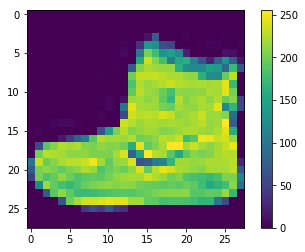

In [51]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

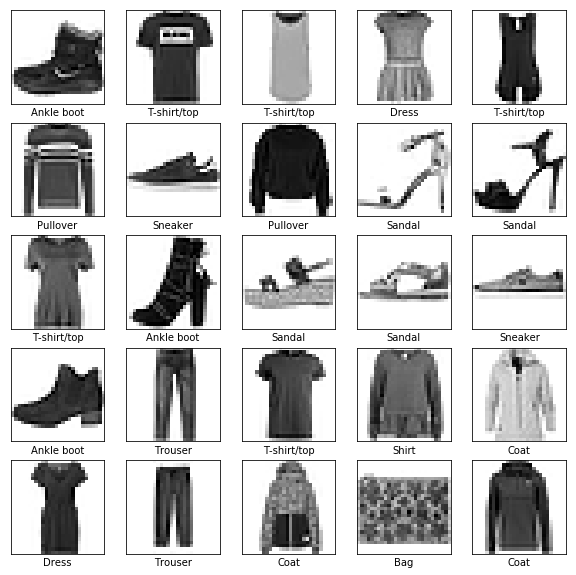

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4972 - accuracy: 0.8257
Epoch 2/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3753 - accuracy: 0.8648
Epoch 3/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3356 - accuracy: 0.8781
Epoch 4/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3142 - accuracy: 0.8838
Epoch 5/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2967 - accuracy: 0.8907


In [57]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/1 - 1s - loss: 0.2674 - accuracy: 0.8769

테스트 정확도: 0.8769


In [0]:
predictions = model.predict(test_images)

In [59]:
predictions[0]

array([5.4898615e-06, 2.5522145e-06, 4.0935311e-06, 1.5515865e-06,
       3.4602421e-05, 4.7037305e-04, 7.7465402e-06, 4.4965208e-02,
       1.7928873e-04, 9.5432907e-01], dtype=float32)

In [60]:
np.argmax(predictions[0])

9

In [61]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

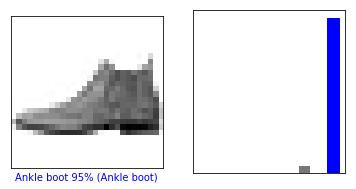

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

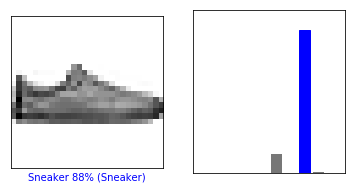

In [64]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

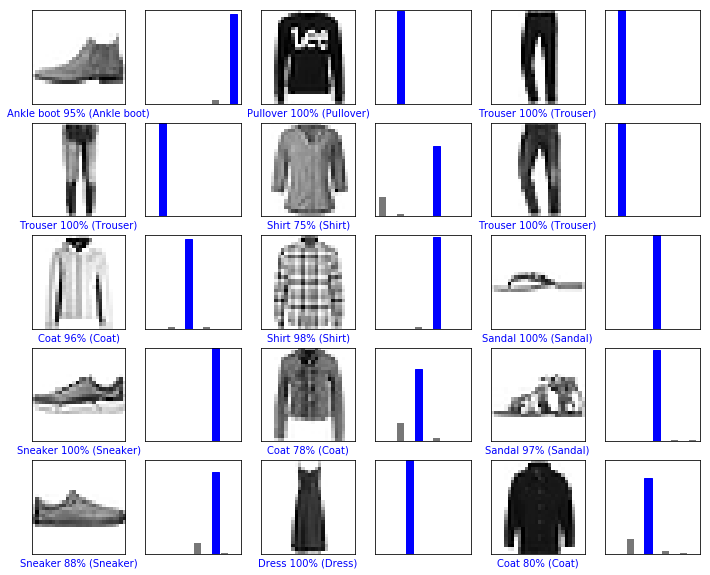

In [65]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [66]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [67]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [68]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.4898778e-06 2.5522145e-06 4.0935233e-06 1.5515880e-06 3.4602486e-05
  4.7037349e-04 7.7465402e-06 4.4965196e-02 1.7928891e-04 9.5432907e-01]]


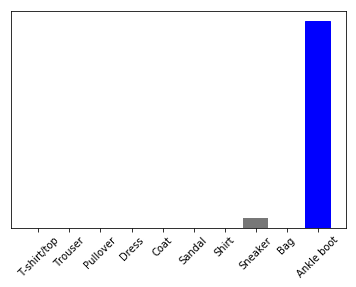

In [69]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [70]:
np.argmax(predictions_single[0])

9

#### 3) Load and preprocess data / CSV

데이터의 용량이 큰 경우에 할 수 있는 방법 (파일로 된것을 generator사용)


Setup

In [71]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

In [73]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

16384/13049 [=====================================] - 0s 0us/step


In [0]:
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

Load data

In [0]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

In [0]:
def get_dataset(file_path, **kwargs): ## **kwargs : make_csv_dataset안에 있는 옵션
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5, # Artificially small to make examples easier to show.
      label_name=LABEL_COLUMN,
      na_value="?",
      num_epochs=1,
      ignore_errors=True, 
      **kwargs)
  return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)

In [0]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print("{:20s}: {}".format(key,value.numpy()))

In [83]:
show_batch(raw_train_data)

sex                 : [b'female' b'female' b'male' b'female' b'male']
age                 : [28.    0.75 28.   23.   26.  ]
n_siblings_spouses  : [8 2 0 3 0]
parch               : [2 1 0 2 0]
fare                : [ 69.55   19.258   7.896 263.      7.887]
class               : [b'Third' b'Third' b'Third' b'First' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'C' b'unknown']
embark_town         : [b'Southampton' b'Cherbourg' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'n' b'n' b'y' b'n' b'y']


In [84]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)

show_batch(temp_dataset)

sex                 : [b'male' b'female' b'male' b'female' b'male']
age                 : [26. 17. 40. 25. 26.]
n_siblings_spouses  : [0 4 0 1 2]
parch               : [0 2 0 1 0]
fare                : [ 8.05   7.925  0.    30.     8.663]
class               : [b'Third' b'Third' b'First' b'Second' b'Third']
deck                : [b'unknown' b'unknown' b'B' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton'
 b'Southampton']
alone               : [b'y' b'n' b'y' b'n' b'n']


Data preprocessing

Continuous data

In [85]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'class', 'deck', 'alone']

temp_dataset = get_dataset(train_file_path, select_columns=SELECT_COLUMNS)

show_batch(temp_dataset)

age                 : [58.  1. 47.  3. 34.]
n_siblings_spouses  : [0 1 0 4 0]
class               : [b'First' b'Third' b'First' b'Third' b'First']
deck                : [b'C' b'unknown' b'E' b'unknown' b'unknown']
alone               : [b'n' b'n' b'y' b'n' b'y']


In [86]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path, 
                           select_columns=SELECT_COLUMNS,
                           column_defaults = DEFAULTS)

show_batch(temp_dataset)

age                 : [27. 22. 24. 27. 33.]
n_siblings_spouses  : [0. 0. 0. 0. 1.]
parch               : [0. 0. 0. 0. 1.]
fare                : [10.5    9.35   7.896 26.    20.525]


In [0]:
example_batch, labels_batch = next(iter(temp_dataset)) 

In [0]:
def pack(features, label):
  return tf.stack(list(features.values()), axis=-1), label #tesorflow

In [89]:
packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

[[11.    5.    2.   46.9 ]
 [ 0.83  0.    2.   29.  ]
 [32.5   0.    0.   13.  ]
 [39.    0.    0.   13.  ]
 [39.    0.    0.   13.  ]]

[0 1 1 0 0]


In [90]:
show_batch(raw_train_data)

sex                 : [b'male' b'male' b'male' b'male' b'female']
age                 : [21. 25. 28. 27. 27.]
n_siblings_spouses  : [0 1 0 0 0]
parch               : [0 0 0 0 2]
fare                : [ 7.796 17.8   14.5    8.663 11.133]
class               : [b'Third' b'Third' b'Third' b'Third' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton'
 b'Southampton']
alone               : [b'y' b'n' b'y' b'y' b'n']


In [0]:
example_batch, labels_batch = next(iter(temp_dataset)) 

중요중요

In [0]:
class PackNumericFeatures(object):
  def __init__(self, names):
    self.names = names

  def __call__(self, features, labels): # raw_train_dada 의 age, n_siblings_spouses, parch, fare
    numeric_freatures = [features.pop(name) for name in self.names] # list를 만들어줌 [[age],[n_siblings_spouses],[parch].[fare]]
    numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_freatures] # tf.float32 형태로 바꿔줌
    numeric_features = tf.stack(numeric_features, axis=-1)
    features['numeric'] = numeric_features

    return features, labels

In [0]:
NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare'] 

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

In [94]:
show_batch(packed_train_data)

sex                 : [b'female' b'male' b'male' b'male' b'male']
class               : [b'First' b'Second' b'Third' b'Second' b'Third']
deck                : [b'C' b'unknown' b'unknown' b'unknown' b'F']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton'
 b'Southampton']
alone               : [b'n' b'y' b'y' b'y' b'y']
numeric             : [[53.     2.     0.    51.479]
 [24.     0.     0.    13.   ]
 [16.     0.     0.     9.5  ]
 [26.     0.     0.    10.5  ]
 [19.     0.     0.     7.65 ]]


In [0]:
example_batch, labels_batch = next(iter(packed_train_data)) 

Data Normalization (여기서는 표준화, 분포에 따라서 log변환)

In [96]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [0]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

In [0]:
def normalize_numeric_data(data, mean, std):
  # Center the data
  return (data-mean)/std

In [99]:
# See what you just created.
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]
numeric_column

NumericColumn(key='numeric', shape=(4,), default_value=None, dtype=tf.float32, normalizer_fn=functools.partial(<function normalize_numeric_data at 0x7fa4e97cd9d8>, mean=array([29.631,  0.545,  0.38 , 34.385]), std=array([12.512,  1.151,  0.793, 54.598])))

In [100]:
example_batch['numeric']

<tf.Tensor: id=71540, shape=(5, 4), dtype=float32, numpy=
array([[40.   ,  0.   ,  0.   , 31.   ],
       [57.   ,  0.   ,  0.   , 12.35 ],
       [34.   ,  1.   ,  0.   , 21.   ],
       [28.   ,  1.   ,  0.   , 82.171],
       [36.   ,  0.   ,  0.   , 10.5  ]], dtype=float32)>

In [101]:
example_batch['numeric']

<tf.Tensor: id=71540, shape=(5, 4), dtype=float32, numpy=
array([[40.   ,  0.   ,  0.   , 31.   ],
       [57.   ,  0.   ,  0.   , 12.35 ],
       [34.   ,  1.   ,  0.   , 21.   ],
       [28.   ,  1.   ,  0.   , 82.171],
       [36.   ,  0.   ,  0.   , 10.5  ]], dtype=float32)>

Categorical data

In [0]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}


In [0]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
  cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab)
  categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [106]:
# See what you just created.
categorical_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Second', 'Third'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Cherbourg', 'Southhampton', 'Queenstown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('y', 'n'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [108]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]


Combined preprocessing layer

In [0]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns+numeric_columns)

In [110]:
print(preprocessing_layer(example_batch).numpy()[0])

[ 1.     0.     1.     0.     0.     1.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     1.     0.     0.     0.829 -0.474
 -0.479 -0.062  1.     0.   ]


Build the model

In [0]:
model = tf.keras.Sequential([
  preprocessing_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

Train, evaluate, and predict

In [0]:
train_data = packed_train_data.shuffle(500) #shuffle은 하는게 좋음 
test_data = packed_test_data

In [113]:
model.fit(train_data, epochs=20)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
126/126 [==============================] - 1s 11ms/step - loss: 0.5121 - accuracy: 0.7656
Epoch 2/20
126/126 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.8182
Epoch 3/20
126/126 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8230
Epoch 4/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8421
Epoch 5/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8469
Epoch 6/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8389
Epoch 7/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.8405
Epoch 8/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8437
Epoch 9/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8485
Epoch

In [114]:
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

53/53 [==============================] - 0s 9ms/step - loss: 0.4488 - accuracy: 0.8447


Test Loss 0.4487872288193343, Test Accuracy 0.8446969985961914


In [115]:
predictions = model.predict(test_data)

# Show some results
for prediction, survived in zip(predictions[:10], list(test_data)[0][1][:10]):
  print("Predicted survival: {:.2%}".format(prediction[0]),
        " | Actual outcome: ",
        ("SURVIVED" if bool(survived) else "DIED"))

Predicted survival: 0.59%  | Actual outcome:  DIED
Predicted survival: 79.36%  | Actual outcome:  DIED
Predicted survival: 24.82%  | Actual outcome:  DIED
Predicted survival: 98.53%  | Actual outcome:  DIED
Predicted survival: 7.52%  | Actual outcome:  DIED


------------------------------------

## 3. [이미지, 음성](https://web.stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly)

Previous situation

In [0]:
import numpy as np
from keras.models import Sequential

# Load entire dataset
X, y = np.load('some_training_set_with_labels.npy')

# Design model
model = Sequential()
[...] # Your architecture
model.compile()

# Train model on your dataset
model.fit(x=X, y=y)

Notations

In [0]:
partition

In [0]:
labels

Data generator

In [0]:
def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
             n_classes=10, shuffle=True):
    'Initialization'
    self.dim = dim
    self.batch_size = batch_size
    self.labels = labels
    self.list_IDs = list_IDs
    self.n_channels = n_channels
    self.n_classes = n_classes
    self.shuffle = shuffle
    self.on_epoch_end()

In [0]:
def on_epoch_end(self):
  'Updates indexes after each epoch'
  self.indexes = np.arange(len(self.list_IDs))
  if self.shuffle == True:
      np.random.shuffle(self.indexes)

In [0]:
def __data_generation(self, list_IDs_temp): # list_IDs_temp :
  'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
  # Initialization
  X = np.empty((self.batch_size, *self.dim, self.n_channels))
  y = np.empty((self.batch_size), dtype=int)

  # Generate data
  for i, ID in enumerate(list_IDs_temp):
      # Store sample
      X[i,] = np.load('data/' + ID + '.npy') 
      # Store class
      y[i] = self.labels[ID]

  return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

In [0]:
def __len__(self):
  'Denotes the number of batches per epoch'
  return int(np.floor(len(self.list_IDs) / self.batch_size))

In [0]:
def __getitem__(self, index):
  'Generate one batch of data'
  # Generate indexes of the batch
  indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

  # Find list of IDs
  list_IDs_temp = [self.list_IDs[k] for k in indexes]

  # Generate data
  X, y = self.__data_generation(list_IDs_temp)

  return X, y

In [0]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp): 
            # Store sample
            X[i,] = np.load('data/' + ID + '.npy') # 원하는 형태로 바꾸면 됨. 그림파일을 데이터로 ?

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

Keras script

In [0]:
import numpy as np

from keras.models import Sequential
from my_classes import DataGenerator

# Parameters
params = {'dim': (32,32,32),
          'batch_size': 64,
          'n_classes': 6,
          'n_channels': 1,
          'shuffle': True}

# Datasets
partition = # IDs
labels = # Labels

# Generators
training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['validation'], labels, **params)

# Design model
model = Sequential()
[...] # Architecture
model.compile()

# Train model on dataset
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=6)